In [1]:
import numpy as np
import random

In [42]:
def decimal_to_binary(array, precision_bits):
    """
    Convert a NumPy array to a binary string.
    
    Args:
        - array (numpy.ndarray): Input array of float or int values.
        - precision_bits (list of tuples): List of tuples containing (min_val, max_val, bits) for each element to define the precision.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string. 
    Returns:
        - binary_string (str): Binary string representing the array.
    """
    
    binary_string = ''.join(
        f'{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}'
        for val, (min_val, max_val, bits) in zip(array, precision_bits)
    )
    
    return binary_string

In [43]:
array = np.array([0.32, 50, 0.25, 0.75])
precision_bits = [(0, 1, 8), (0, 100, 10), (0, 1, 8), (0, 1, 8)]
binary_string = decimal_to_binary(array, precision_bits)
print(type(binary_string))
print(binary_string)

<class 'str'>
0101000101111111110011111110111111


In [44]:
def binary_to_decimal(binary_string, precision_bits):
    """
    Convert a binary string back to a NumPy array.
    
    Args:
        - binary_string (str): Binary string to be converted.
        - precision_bits (list of tuples): List of tuples containing (min_val, max_val, bits) for each element to define the precision.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
    
    Returns:
        - arr (numpy.ndarray): Array of float or int values represented by the binary string.
    """
    
    arr = []
    index = 0
    
    for min_val, max_val, bits in precision_bits:
        
        segment = binary_string[index:index + bits]
        int_value = int(segment, 2)
        max_int_value = (1 << bits) - 1
        real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
        arr.append(real_value)
        index += bits
        
    return np.array(arr)

In [45]:
array = binary_to_decimal(binary_string, precision_bits)
print(type(array))
print(array)

<class 'numpy.ndarray'>
[ 0.31764706 49.95112414  0.24705882  0.74901961]


In [46]:
array1 = np.array([0.32, 50, 0.25, 0.75, 23, 43, 54, 98, 78, 90, .3])
precision_bits1 = [(0, 1, 8), (0, 100, 10), (0, 1, 8), (0, 1, 8), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0, 100, 10), (0,1, 8)]
binary_string1 = decimal_to_binary(array1, precision_bits1)
print(len(binary_string1))

102


In [47]:
array2 = binary_to_decimal(binary_string1, precision_bits1)
array2

array([ 0.31764706, 49.95112414,  0.24705882,  0.74901961, 22.971652  ,
       42.91300098, 53.95894428, 97.94721408, 77.90811339, 89.9315738 ,
        0.29803922])

In [48]:
def initialize_population(pop_size, bit_length):
    return [''.join(random.choice('01') for _ in range(bit_length)) for _ in range(pop_size)]


In [50]:
g = initialize_population(20, 50)
print(g)
print(len(g[1]))

['11000000010001010110011101010010111001100001101110', '11110101010110010011000100010000000100001100001111', '00000100010110110000001101101011111100111001011001', '01100110111111011000110111000111101000101111000111', '11100110011101011000110011010111001101111001010111', '01111001100111000101010110100011100010000101001010', '01101111110001011100110010000110010000101001110111', '10100001010011001100001001111011101111001110001100', '11101001000111100000010100101001110001001101010100', '10000010010101101101110110010000010001001111111110', '10000010100110000100000101100101110100011011101011', '11101010010100101111000010111100110100000000001101', '00100001110001111111110001110111010000001011011101', '01111110010000010110010010000010111011100001011110', '00011001101010100100001101111101110010010111110011', '00100000000001000000000001011000000100111111001100', '11011000010110101101100001110111001101001110100101', '01110001000100010011011001011011010010011011100000', '00100110000011000100111011

In [51]:
h = [(1, 2, 4) ]
h

[(1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4)]

In [53]:
def compute_fitness(pop, target):
    
    """
    Compute the fitness value for each individual in the population.
    
    Args:
        pop (list of str): The population of individuals, each represented as a binary string.
        target (str): The target binary string to compare against.
    
    Returns:
        list of int: A list of fitness values, one for each individual in the population.
    """
    
    fitness_values = []
    
    for individual in pop:
        
        fitness = sum(1 for i, j in zip(individual, target) if i == j)
        fitness_values.append(fitness)
        
    return fitness_values

# Example usage:
population = ['11001010101010111111100', '10111111110000011111101', '111111100000000000123100']
target = '11111111111111111111111'
fitness = compute_fitness(population, target)
print(fitness)  # Output: [4, 3, 3]


[14, 16, 9]


In [54]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores.
    using Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        - population (list of str): The current population of individuals, each represented as a binary string.
        - fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list) : The selected parents for the next generation.
    """

    probabilities = fitness_scores / np.sum(fitness_scores)

    selected = np.random.choice(population, size=len(population), p=probabilities)

    return selected

In [65]:
pop_ = initialize_population(10, 10)
print(pop_)
fitnesses = compute_fitness(pop_, "1000100100")
print(fitnesses)
parents = select_parents(pop_, fitnesses)
print(parents)

['1101011101', '1010101001', '0011111011', '1001011100', '0100100110', '0001111001', '1110000110', '0111100001', '1100100011', '1100001010']
[4, 6, 2, 6, 7, 4, 6, 4, 6, 5]
['0001111001' '0111100001' '1100001010' '1100001010' '1001011100'
 '1001011100' '1101011101' '1110000110' '1001011100' '0011111011']


In [74]:
import random

def crossover(parent1, parent2, crossover_rate=0.9, num_crossover_points=1):
    """
    Perform multi-point crossover between two parents to generate two offspring.
    
    Args:
        parent1 (str): The binary string representing the first parent.
        parent2 (str): The binary string representing the second parent.
        crossover_rate (float, optional): The probability of performing a crossover. Defaults to 0.7.
        num_crossover_points (int, optional): The number of crossover points between the two parents. Defaults to 1.
    
    Returns:
        tuple of str: Two binary strings representing the offspring.
    
    Example:
        offspring1, offspring2 = crossover('11001', '10110', crossover_rate=0.7, num_crossover_points=2)
    """
    if random.random() < crossover_rate:
        crossover_points = sorted(random.sample(range(1, len(parent1)), num_crossover_points))
        offspring1 = []
        offspring2 = []
        for i in range(len(crossover_points) + 1):
            start = 0 if i == 0 else crossover_points[i - 1]
            end = len(parent1) if i == len(crossover_points) else crossover_points[i]
            if i % 2 == 0:
                offspring1.extend(parent1[start:end])
                offspring2.extend(parent2[start:end])
            else:
                offspring1.extend(parent2[start:end])
                offspring2.extend(parent1[start:end])
        return ''.join(offspring1), ''.join(offspring2)
    return parent1, parent2


In [75]:
parent1 = '111111111111111111111111111111'
parent2 = '000000000000000000000000000000'
offspring1, offspring2 = crossover(parent1, parent2, num_crossover_points=2)
print(offspring1, offspring2)

111111111111111111111000000011 000000000000000000000111111100


In [77]:
import random

def mutate(chromosome, mutation_rate):
    """
    Mutate a binary chromosome based on the mutation rate.
    
    Args:
        chromosome (str): The binary string representing the chromosome.
        mutation_rate (float): The probability of mutating each bit.
    
    Returns:
        str: The mutated binary string.
    
    Example:
        mutated_chromosome = mutate('11001', mutation_rate=0.1)
    """
    mutated_chromosome = []
    for bit in chromosome:
        if random.random() <= mutation_rate:
            # Mutate the bit if the random number is less than or equal to the mutation rate
            mutated_chromosome.append('1' if bit == '0' else '0')
        else:
            mutated_chromosome.append(bit)
    return ''.join(mutated_chromosome)


In [85]:

mutated_chromosome = mutate('1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', mutation_rate=0.1)
print(mutated_chromosome)

1111011111110111111111111111111111101111101011101101110111111110111111101111111111111111111111


In [6]:
import numpy as np

def decimal_to_binary(array_list, precision_bits_list):
    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        list of str: List of binary strings representing the arrays.
    """

    binary_strings = []
    
    for array, precision_bits in zip(array_list, precision_bits_list):
        min_val, max_val, bits = precision_bits
        
        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )
        
        binary_strings.append(binary_string)
        
    return binary_strings


def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        binary_string_list (list of str): List of binary strings to be converted.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        list of numpy.ndarray: List of arrays of float or int values represented by the binary strings.
    """
    
    arrays = []
    
    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):
        min_val, max_val, bits = precision_bits
        array = []
        index = 0
        for _ in range(shape[0]):
            row = []
            for _ in range(shape[1]):
                segment = binary_string[index:index + bits]
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            array.append(row)
        arrays.append(np.array(array))
    return arrays


precision_bits_list = [
    (0, 1, 8),  # Precision for the first array
    (0, 1, 10),  # Precision for the second array
    (0, 10, 10)
]

# 2D array examples
array_2d_1 = np.array([[0.5, 0.75], [0.25, 0.6]])
array_2d_2 = np.array([[0.1, 0.9], [0.4, 0.8]])
array_2d_3 = np.array([[2, 3, 4, 5]])

array_list = [array_2d_1, array_2d_2, array_2d_3]
shapes = [array_2d_1.shape, array_2d_2.shape, array_2d_3.shape]

binary_strings = decimal_to_binary(array_list, precision_bits_list)
restored_arrays = binary_to_decimal(binary_strings, precision_bits_list, shapes)

print('Original 2D_1:', array_2d_1)
print('Binary 2D_1:', binary_strings[0])
print('Restored 2D_1:', restored_arrays[0])

print('Original 2D_2:', array_2d_2)
print('Binary 2D_2:', binary_strings[1])
print('Restored 2D_2:', restored_arrays[1])

print(array_2d_3.shape)
print(binary_strings[-1])
print(restored_arrays[-1].shape)

print(restored_arrays)
print(binary_strings)


Original 2D_1: [[0.5  0.75]
 [0.25 0.6 ]]
Binary 2D_1: 01111111101111110011111110011001
Restored 2D_1: [[0.49803922 0.74901961]
 [0.24705882 0.6       ]]
Original 2D_2: [[0.1 0.9]
 [0.4 0.8]]
Binary 2D_2: 0001100110111001100001100110011100110010
Restored 2D_2: [[0.09970674 0.89931574]
 [0.3998045  0.79960899]]
(1, 4)
0011001100010011001001100110010111111111
(1, 4)
[array([[0.49803922, 0.74901961],
       [0.24705882, 0.6       ]]), array([[0.09970674, 0.89931574],
       [0.3998045 , 0.79960899]]), array([[1.9941349 , 2.99120235, 3.99804497, 4.99511241]])]
['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']


In [15]:
def build_chromosomes(sp1, sp2, sp1_cells, sp2_cells, params):

    population = []
    
    for i in range(len(sp1)):
        population.append([sp1[i], sp2[i], sp1_cells[i], sp2_cells[i], params[i]])

    return population

In [16]:
f = build_chromosomes(["222","333","111"], ["444","555","666"], ["777","888","999"],["101010", "111111", "121212"], [1,2,3,])
f

[['222', '444', '777', '101010', 1],
 ['333', '555', '888', '111111', 2],
 ['111', '666', '999', '121212', 3]]

In [21]:
def extract_based_on_max_index(list1, list2):
    """
    Extract an object from list1 based on the index of the maximum value in list2.

    Args:
        list1 (list): The list from which to extract the object.
        list2 (list): The list used to determine the index of the maximum value.

    Returns:
        object: The object from list1 corresponding to the index of the maximum value in list2.
    """
    max_index = list2.index(max(list2))
    return list1[max_index]

# Example usage:
list1 = ['a', 'b', 'c', 'd']
list2 = [10, 222, 30, 25]

result = extract_based_on_max_index(list1, list2)
print(result)  # Output: 'c'


b


In [22]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores.
    using Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        - population (list of str): The current population of individuals, each represented as a binary string.
        - fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list) : The selected parents for the next generation.
    """

    probabilities = fitness_scores / np.sum(fitness_scores)

    selected = np.random.choice(population, size=len(population), p=probabilities)

    return selected

pop = ["231456", "123456", "232123", "345654", "489766", "123456"]
f = [1,2,4,3,6,5]
p = select_parents(pop, f)
p


array(['345654', '232123', '489766', '232123', '489766', '123456'],
      dtype='<U6')

In [25]:
import random

def crossover(parents1, parents2, crossover_rates, num_crossover_points):
    """
    Perform multi-point crossover between two parents to generate two offspring.

    Args:
        parent1 (list of str): A list of binary strings representing the first parent.
        parent2 (list of str): A list of binary strings representing the second parent.
        crossover_rates (list of float): A list of probabilities of performing crossover for each sub-chromosome.
        num_crossover_points (list of int): A list containing the number of crossover points for each sub-chromosome.

    Returns:
        tuple of list: Two lists of binary strings representing the offspring.

    Example:
        offspring1, offspring2 = crossover(['11001', '10110'], ['00110', '11001'], [0.7, 0.7], [2, 2])
    """
    offspring1 = []
    offspring2 = []

    for parent1, parent2, crossover_rate, num_points in zip(parents1, parents2, crossover_rates, num_crossover_points):
        if random.random() < crossover_rate:
            crossover_points = sorted(random.sample(range(1, len(parent1)), num_points))
            child1, child2 = [], []
            start = 0
            for i, point in enumerate(crossover_points + [len(parent1)]):
                if i % 2 == 0:
                    child1.extend(parent1[start:point])
                    child2.extend(parent2[start:point])
                else:
                    child1.extend(parent2[start:point])
                    child2.extend(parent1[start:point])
                start = point
            offspring1.append(''.join(child1))
            offspring2.append(''.join(child2))
        else:
            offspring1.append(parent1)
            offspring2.append(parent2)

    return offspring1, offspring2


parents1 = ['110010001011', '1011000', "1111111111"]
parents2 = ['001100000001', '1100111', "0000000000"]
crossover_rates = [0.85, 0.7, .90]
num_crossover_points = [2, 2, 2]

offspring1, offspring2 = crossover(parents1, parents2, crossover_rates, num_crossover_points)
print(offspring1)
print(offspring2)


['110010001011', '1111000', '1100000001']
['001100000001', '1000111', '0011111110']


In [27]:
import random

def mutate(chromosome, mutation_rates):
    """
    Mutate a chromosome with sub-chromosomes (each sub-chromosome is a binary string) based on the mutation rates.

    Args:
        - chromosome (list of str): The list contains binary strings representing the chromosome, 
                                    where each binary string is a sub-chromosome.
        - mutation_rates (list of float): The probabilities of mutating each bit in each sub-chromosome.

    Returns:
        - mutated_chromosome (list of str): The mutated chromosome, with each sub-chromosome mutated based on the corresponding mutation rate.
    
    Example:
        chromosome = ['11001', '10110']
        mutation_rates = [0.1, 0.2]
        mutated_chromosome = mutate(chromosome, mutation_rates)
    """
    mutated_chromosome = []

    for sub_chromosome, mutation_rate in zip(chromosome, mutation_rates):
        mutated_sub_chromosome = ''.join(
            '1' if bit == '0' and random.random() <= mutation_rate else
            '0' if bit == '1' and random.random() <= mutation_rate else
            bit
            for bit in sub_chromosome
        )
        mutated_chromosome.append(mutated_sub_chromosome)

    return mutated_chromosome


chromosome = ['0000000000000000000000000000000', '111111111111111111111111111111111111111111']
mutation_rates = [0.1, 0.2]  

mutated_chromosome = mutate(chromosome, mutation_rates)
print(mutated_chromosome)


['0110000000010000000000101100000', '100100001011111111111111010111011111010111']


In [32]:
c1 = ["1111111111", "00000000000"]
c2 = ["1111111", "101010101000110100101", "00000000000000"]
m1 = [0.1, 0.09]
m2 = [.2, 0.1, 0.8]
n = []
n.extend([mutate(c1, m1), mutate(c2, m2)])

In [33]:
n

[['0111101111', '00000000000'],
 ['1111010', '101000101000110100101', '10111111111110']]

In [1]:
import numpy as np
j = np.array([[1,2,3,4,5]])
print(j.shape)
print(j[0, 2])

(1, 5)
3


In [4]:
sp1_cells = np.zeros((20, 20))
sp1_cells[:, 0] = 1
sp2_cells = np.zeros((20, 20))
sp2_cells[:, 4] = 1
print(sp1_cells)
print(sp2_cells)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

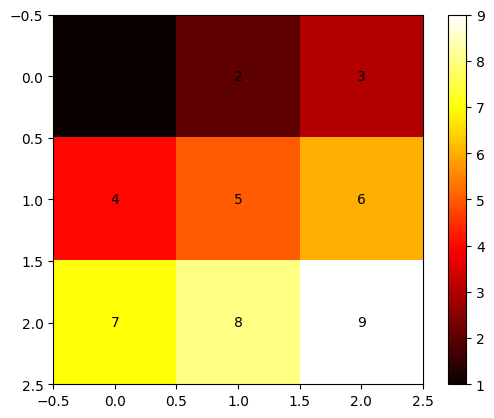

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

fig, ax = plt.subplots()
cax = ax.imshow(data, cmap="hot", interpolation="nearest")

# Add colorbar
cbar = fig.colorbar(cax)

# Annotate each cell with the numeric value
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, data[i, j], ha='center', va='center', color='black')

plt.show()


In [ ]:
def decimal_to_binary(array_list, precision_bits_list):

    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        - array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        - binary_strings (list of str): List of binary strings representing the arrays.
    """

    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )

        binary_strings.append(binary_string)

    return binary_strings


In [7]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores.
    using Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        - population (list of str): The current population of individuals, each represented as a binary string.
        - fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list) : The selected parents for the next generation.
    """
    
    probabilities = fitness_scores / np.sum(fitness_scores)

    selected = np.random.choice(population, size=len(population), p=probabilities)

    return selected


pop = [
    ['011011001', '0001100110010', '00110011111111'], 
    ['0111111010011001', '000110010011100110010', '00110010010111111111'],
    ['011111111001', '0011100110010', '0011111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']
]
f = [3, 4, 5, 10, 12, 1]
p = select_parents(pop, f)
p

ValueError: a must be 1-dimensional

In [10]:
import numpy as np

def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores
    using the Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        population (list of list of str): The current population of individuals, each represented as a binary string.
        fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list): The selected parents for the next generation.
    """
    
    probabilities = np.array(fitness_scores) / np.sum(fitness_scores)

    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    selected = [population[i] for i in selected_indices]

    return selected

# Example usage
pop = [
    ['011011001', '0001100110010', '00110011111111'], 
    ['0111111010011001', '000110010011100110010', '00110010010111111111'],
    ['011111111001', '0011100110010', '0011111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']
]
f = [3, 4, 5, 10, 12, 1]
p = np.array(select_parents(pop, f))
print(p)


[['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['011111111001' '0011100110010' '0011111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']
 ['01111111101111110011111110011001'
  '0001100110111001100001100110011100110010'
  '0011001100010011001001100110010111111111']]


In [11]:
o = np.random.choice(p)

ValueError: a must be 1-dimensional

In [12]:
def select_parents(population, fitness_scores):
    """
    Select parents for the next generation based on their fitness scores
    using the Fitness Proportionate Selection (Roulette Wheel Selection) method.

    Args:
        population (list of list of str): The current population of individuals, each represented as a binary string.
        fitness_scores (list of float): The fitness scores of the individuals in the population.

    Returns:
        selected (list): The selected parents for the next generation.
    """

    total_fitness = np.sum(fitness_scores)

    if total_fitness == 0:
        probabilities = np.ones(len(fitness_scores)) / len(fitness_scores)
    else:
        probabilities = np.array(fitness_scores) / total_fitness

    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    selected = [population[i] for i in selected_indices]

    return selected

pop = [
    ['011011001', '0001100110010', '00110011111111'], 
    ['0111111010011001', '000110010011100110010', '00110010010111111111'],
    ['011111111001', '0011100110010', '0011111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111']
]
f = [3, 4, 5, 10, 12, 1]
p = select_parents(pop, f)
print(p)


[['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'], ['011111111001', '0011100110010', '0011111'], ['011111111001', '0011100110010', '0011111'], ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'], ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '0011001100010011001001100110010111111111'], ['011111111001', '0011100110010', '0011111']]


In [14]:
def decimal_to_binary(array_list, precision_bits_list):

    """
    Convert a list of 2D NumPy arrays to a list of binary strings.

    Args:
        - array_list (list of numpy.ndarray): List of input 2D arrays of float or int values.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.

    Returns:
        - binary_strings (list of str): List of binary strings representing the arrays.
    """

    binary_strings = []

    for array, precision_bits in zip(array_list, precision_bits_list):

        min_val, max_val, bits = precision_bits

        binary_string = ''.join(
            f"{int((val - min_val) / (max_val - min_val) * ((1 << bits) - 1)):0{bits}b}"
            for sub_array in array for val in sub_array
        )

        binary_strings.append(binary_string)

    return binary_strings




def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        - binary_string_list (list of str): List of binary strings to be converted.
        - precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        - shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        - arrays (list of numpy.ndarray): List of arrays of float or int values represented by the binary strings.
    """

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):

        min_val, max_val, bits = precision_bits
        array = []
        index = 0

        for _ in range(shape[0]):

            row = []

            for _ in range(shape[1]):

                segment = binary_string[index:index + bits]
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            array.append(row)

        arrays.append(np.array(array))

    return arrays


pop = [
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']  
]
pre = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]
sh = [(2, 2), (1, 5), (3, 2)]

dec = binary_to_decimal(pop, pre, sh)
dec


TypeError: int() can't convert non-string with explicit base

In [15]:
import numpy as np

def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        binary_string_list (list of str): List of binary strings to be converted.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        arrays (list of numpy.ndarray): List of arrays of float or int values represented by the binary strings.
    """

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):
        min_val, max_val, bits = precision_bits

        # Reshape binary string into 2D array
        binary_2d = np.array([list(segment) for segment in binary_string])

        # Convert binary string to integer
        int_values = binary_2d.astype(int)

        # Calculate maximum integer value for given bits
        max_int_value = (1 << bits) - 1

        # Scale integer values to the range [min_val, max_val]
        real_values = min_val + (max_val - min_val) * int_values / max_int_value

        # Reshape real values into original shape
        array = real_values.reshape(shape)

        arrays.append(array)

    return arrays

# Example usage
pop = [
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']  
]
pre = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]
sh = [(2, 2), (1, 5), (3, 2)]

dec = binary_to_decimal(pop, pre, sh)
print(dec)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [16]:
def binary_to_decimal(binary_string_list, precision_bits_list, shapes):
    """
    Convert a list of binary strings back to a list of 2D NumPy arrays.

    Args:
        binary_string_list (list of str): List of binary strings to be converted.
        precision_bits_list (list of tuple): List of tuples containing (min_val, max_val, bits) to define the precision for each array.
            - min_val (float): The minimum possible value of the original range for the element.
            - max_val (float): The maximum possible value of the original range for the element.
            - bits (int): The number of bits used to represent the element in the binary string.
        shapes (list of tuple): List of shapes for the original arrays.

    Returns:
        arrays (list of numpy.ndarray): List of arrays of float or int values represented by the binary strings.
    """

    arrays = []

    for binary_string, precision_bits, shape in zip(binary_string_list, precision_bits_list, shapes):
        min_val, max_val, bits = precision_bits

        array = []
        index = 0

        for _ in range(shape[0]):

            row = []

            for _ in range(shape[1]):

                segment = binary_string[index:index + bits]
                print(f"Segment: {segment}, Binary String: {binary_string}, Index: {index}, Bits: {bits}")
                int_value = int(segment, 2)
                max_int_value = (1 << bits) - 1
                real_value = min_val + (max_val - min_val) * (int_value / max_int_value)
                row.append(real_value)
                index += bits
            
            array.append(row)

        arrays.append(np.array(array))

    return arrays

pop = [
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'],
    ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000']  
]
pre = [(0, 1, 8), (0, 1, 8), (0, 1, 8)]
sh = [(2, 2), (1, 5), (3, 2)]

dec = binary_to_decimal(pop, pre, sh)
print(dec)


Segment: ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'], Binary String: ['01111111101111110011111110011001', '0001100110111001100001100110011100110010', '001100110001001100100110011001011111111100000000'], Index: 0, Bits: 8


TypeError: int() can't convert non-string with explicit base